```
This software is part of GPU Ocean. 

Copyright (C) 2023 SINTEF Digital

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

# OpenDrift with NorKyst800

In [5]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset
from IPython.display import display
import xarray as xr

from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models.leeway import Leeway
from opendrift.models.oceandrift import OceanDrift

#For plotting
import matplotlib
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import animation, rc
plt.rcParams["animation.html"] = "jshtml"
mpl.rcParams['figure.facecolor'] = 'white'

In [14]:
source_url_yesterday = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2023062300.nc'
source_url_today = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2023062400.nc'
#wind_url = "https://thredds.met.no/thredds/dodsC/aromearcticarchive/2023/03/19/arome_arctic_det_2_5km_20230319T00Z.nc"



In [8]:
norkyst_ds = xr.open_dataset(source_url)
norkyst_ds

<xarray.Dataset>
Dimensions:                  (s_rho: 35, s_w: 36, X: 2602, Y: 902, depth: 16,
                              time: 24)
Coordinates:
  * X                        (X) float64 0.0 800.0 ... 2.08e+06 2.081e+06
  * Y                        (Y) float64 0.0 800.0 1.6e+03 ... 7.2e+05 7.208e+05
  * depth                    (depth) float64 0.0 3.0 10.0 ... 1e+03 2e+03 3e+03
  * time                     (time) datetime64[ns] 2023-06-23 ... 2023-06-23T...
    lat                      (Y, X) float64 ...
    lon                      (Y, X) float64 ...
Dimensions without coordinates: s_rho, s_w
Data variables: (12/21)
    Cs_r                     (s_rho) float64 ...
    Cs_w                     (s_w) float64 ...
    forecast_reference_time  datetime64[ns] ...
    hc                       float64 ...
    projection_stere         int32 ...
    AKs                      (time, depth, Y, X) float32 ...
    ...                       ...
    ubar                     (time, Y, X) float32 ...
    v                        (time, depth, Y, X) float32 ...
    v_northward              (time, depth, Y, X) float32 ...
    vbar                     (time, Y, X) float32 ...
    w                        (time, depth, Y, X) float32 ...
    zeta                     (time, Y, X) float32 ...
Attributes: (12/60)
    file:                            /home/metno_op/run/norkyst-800m_2017/oce...
    type:                            ROMS/TOMS history file
    title:                           NorKyst-800m - ROMS
    var_info:                        /home/metno_op/sea/ROMS/metroms_apps/nor...
    rst_file:                        /home/metno_op/run/norkyst-800m_2017/oce...
    his_file:                        /home/metno_op/run/norkyst-800m_2017/oce...
    ...                              ...
    publisher_institution:           Norwegian Meteorological Institute
    publisher_email:                 adc-support@met.no
    publisher_url:                   https://adc.met.no/
    project:                         Ocean and Ice - Research to Operation (H...
    license:                         https://spdx.org/licenses/CC-BY-4.0.html...
    DODS_EXTRA.Unlimited_Dimension:  time

In [9]:
lat, lon = 63.450441, 10.401975


reader_norkyst = reader_netCDF_CF_generic.Reader([source_url_yesterday, source_url_today])
reader_norkyst.start_time
#
# reader_wind = reader_netCDF_CF_generic.Reader(wind_url)

datetime.datetime(2023, 6, 23, 0, 0)

In [12]:
o = Leeway(loglevel=50)

#o.add_reader([reader_barents, reader_wind])
o.add_reader(reader_norkyst)

o.seed_elements(lat=lat, lon=lon, time=reader_norkyst.start_time + timedelta(hours=12), number=100, radius=300)
                #wind_drift_factor=[0, 0.01, 0.02, 0.03, 0.04, 0.05])

o.run(duration = timedelta(hours=12)) #, time_step = 300, time_step_output = 300)


c:\Users\havardh\Miniconda3\envs\opendrift\Lib\site-packages\opendrift\readers\interpolation\interpolators.py:17: RuntimeWarning: overflow encountered in cast
  data[mask] = np.finfo(np.float64).min


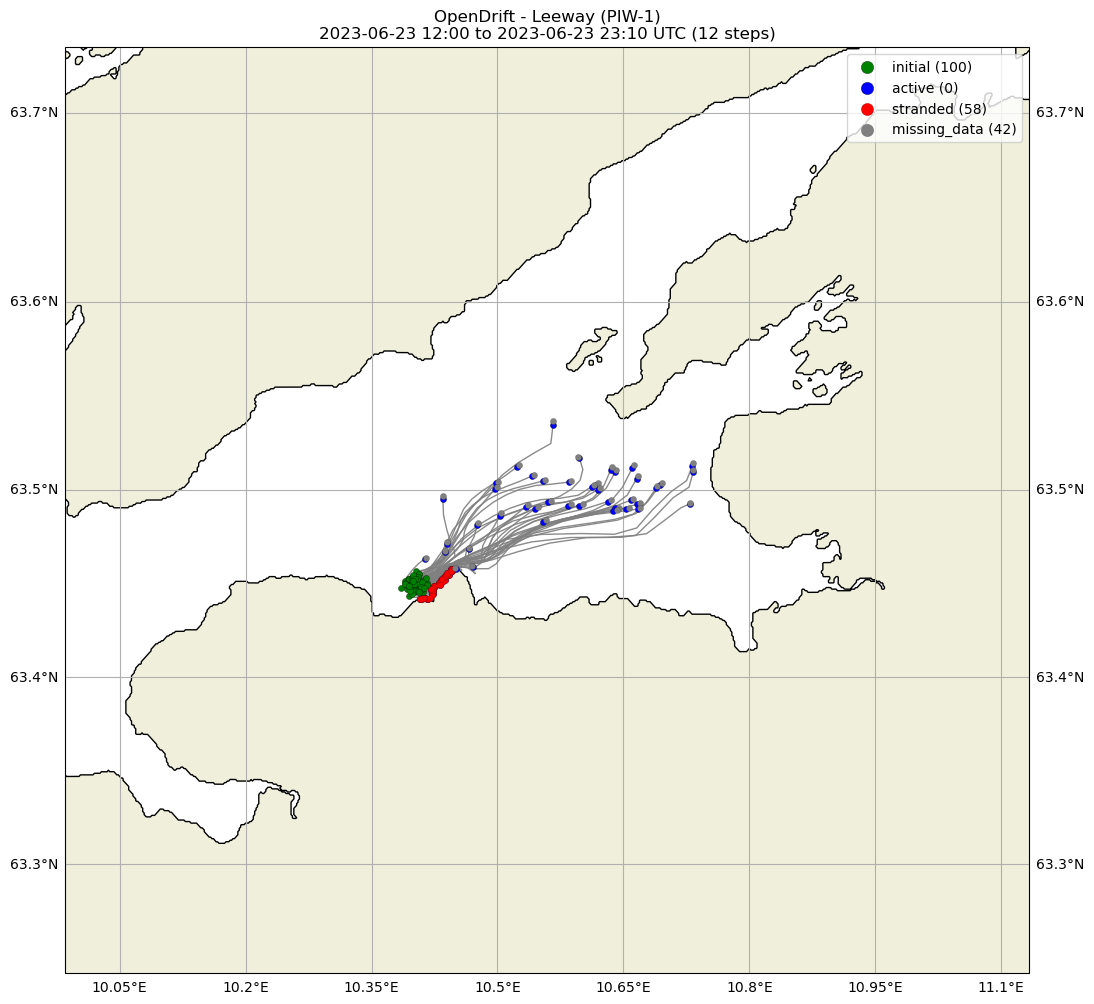

(<GeoAxes: title={'center': 'OpenDrift - Leeway (PIW-1)\n2023-06-23 12:00 to 2023-06-23 23:10 UTC (12 steps)'}>,
 <Figure size 1100x1058.12 with 1 Axes>)

In [13]:
o.plot()

In [19]:
for i, j in enumerate(o.history_metadata):
    print(i, j)

0 ID
1 status
2 moving
3 age_seconds
4 origin_marker
5 lon
6 lat
7 z
8 object_type
9 orientation
10 jibe_probability
11 downwind_slope
12 crosswind_slope
13 downwind_offset
14 crosswind_offset
15 downwind_eps
16 crosswind_eps
17 current_drift_factor
18 x_wind
19 y_wind
20 x_sea_water_velocity
21 y_sea_water_velocity
22 land_binary_mask
